In [1]:
import numpy as np

def upper_bound(x, l):
    return np.exp(l * x + l * np.log(l) + (1 - l) * np.log(1 - l))

def lower_bound(x, ksi):
    l = 0.5 * (sigma(ksi) - 0.5) / ksi
    return sigma(ksi) * np.exp((x - ksi) / 2 - l * (x * x - ksi * ksi))

def sigma(x):
    return 1. / (1 + np.exp(-x))

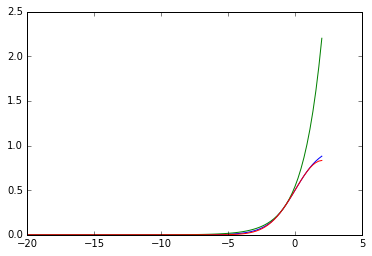

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-20, 2, 100)
plt.plot(x, sigma(x))
plt.plot(x, upper_bound(x, 0.7))
plt.plot(x, lower_bound(x, 0.5))

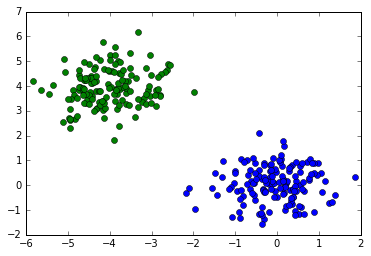

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

n1 = 150
n2 = 150
x1, y1 = np.random.multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]], n1).T
plt.plot(x1, y1, 'o')
x2, y2 = np.random.multivariate_normal([-4, 4], [[0.5, 0], [0, 0.5]], n2).T
plt.plot(x2, y2, 'o')

class1 = np.concatenate([x1.reshape(-1, 1), y1.reshape(-1, 1)], axis=1)
class2 = np.concatenate([x2.reshape(-1, 1), y2.reshape(-1, 1)], axis=1)
y = np.ones(n1 + n2)
y[:n1] *= -1
X = np.concatenate((class1, class2))

In [4]:
from rvm import RVM
# Automatically reload imports.
%load_ext autoreload
%autoreload 2

In [5]:
est = RVM()
l = est.fit(X, y)

-273.454304459
-314.017437128
-484.316998114
-805.532768447
-1401.79527574
-2471.17573108
-4376.54302232
-7783.75515304
-13920.738479
-24900.9891105
-44607.7227958
-79966.7954497
-143304.621719
-256661.77128
-459265.966748
-820389.117429
-1461218.36655
-2588915.21313
-4543518.88509
-7845193.80553
-13186618.6905
-21252128.5094
-32245900.5205
-45311363.5662
-58530610.5946
-69897281.2042
-78382055.5925
-84070550.1715
-87614862.0666
-89723329.4086
-90943254.1646
-91637759.4972
-92029506.4679
-92249326.7949
-92372312.8962
-92441008.8195
-92479344.8686
-92500727.5066
-92512650.6598
-92519298.0591
-92523003.7895
-92525069.5234
-92526221.0207
-92526862.8874
-92527220.6731
-92527420.107
-92527531.2735
-92527593.2388
-92527627.7788
-92527647.0317
-92527657.7634
-92527663.7453
-92527667.0797
-92527668.9383
-92527669.9744
-92527670.5518
-92527670.8737
-92527671.0531
-92527671.1532
-92527671.2089
-92527671.24
-92527671.2573
-92527671.267
-92527671.2723
-92527671.2753
-92527671.277
-92527671.2779
-9

In [29]:
print bound(l)

-114.477835562


In [ ]:
l = np.concatenate((np.logspace(-10, -1), np.linspace(0.1, 0.9, 100), 1. - np.logspace(-8, -1)[::-1]))

In [ ]:
def f(x, A):
    return (1 - x) * np.log(1 - x) + x * np.log(x) + A * x * x

In [ ]:
A = 10
plt.plot(l, f(l, A))

In [ ]:
f(2. / A, A)

In [ ]:
np.min(f(l, A))

In [ ]:
# X = np.array([[200., 3.], [1., 1.], [-1., 4], [3., 5.]])
# y = np.array([1, 1, -1, -1])
X = np.array([[200., 3.], [1., 1.]])
y = np.array([1, 1])

In [24]:
Y = X.copy()
for i in xrange(X.shape[0]):
    Y[i] *= y[i]
def bound(l):
    w = (l * y).dot(X)
    return ((1 - l) * np.log(1 - l) + l * np.log(l)).sum() + 0.5 * w.dot(w)

def gradient(l):
    return np.log(l) - np.log(1 - l) + Y.dot((l * y).dot(X))

def hessian(l):
    return np.diag(1./ l / (1 - l)) + Y.dot(Y.T)

def step(l):
    f = -Y.dot((l * y).dot(X))
    print f, sigma(f)
    return sigma(f)

In [ ]:
l = 0.25 * np.ones(X.shape[0])

In [ ]:
print bound(l)

In [ ]:
print gradient(l)

In [ ]:
print step(step(l))

In [22]:
for i in range(5):
    l = step(l)

print l, bound(l)
print gradient(l)

NameError: name 'step' is not defined

In [ ]:
import scipy.optimize as scopt

scopt.minimize(bound, 0.5 * np.ones(X.shape[0]), method='TNC', jac=gradient, hess=hessian, bounds=[(0.00001, 1)] * X.shape[0])

In [ ]:
lmb = 0.5
for i in xrange(100):
    lmb = 1. / (1 + np.exp(6 * lmb))
    print lmb